In [1]:
from spatialmath.base import *
import ipywidgets as widgets
import matplotlib.pyplot as plt
%matplotlib notebook
get_ipython().display_formatter.formatters['text/plain'].for_type(np.ndarray, lambda obj, p, cycle: p.text(str(obj)) if not cycle else '...')

# Demonstrating the base functions
## Working in 3D

Rotations in 3D can be represented by rotation matrices – 3x3 orthonormal matrices – which belong to the group SO(3). 

We can create such a matrix, a rotation of $\pi/4$ radians around the x-axis by

In [2]:
R = rotx(math.pi/4)
R

[[ 1.          0.          0.        ]
 [ 0.          0.70710678 -0.70710678]
 [ 0.          0.70710678  0.70710678]]

which is a numpy array which we can consider as a matrix.  It is not any old 3x3 matrix, it has special properties, each column (and row) is a unit vector, and they are all orthogonal, ie. the cross product of any two columns (or rows) is zero.  More usefully, the inverse of this matrix is equal to its transpose

In [3]:
R.T @ R

[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00 -1.01465364e-17]
 [ 0.00000000e+00 -1.01465364e-17  1.00000000e+00]]

Note that with numpy we have to use the operator `@` to perform matrix multiplication.  The operator `*` performs elementwise multiplication (aka  Hadamard or Schur product).

The determinant is equal to +1

In [4]:
np.linalg.det(R)

1.0

We can specify the angle in degrees as well

In [5]:
R = rotx(45, 'deg')
R

[[ 1.          0.          0.        ]
 [ 0.          0.70710678 -0.70710678]
 [ 0.          0.70710678  0.70710678]]

We can visualize what this looks like by

<IPython.core.display.Javascript object>


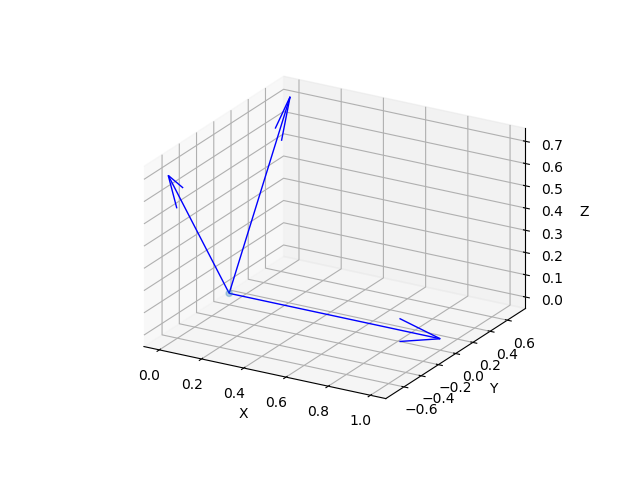

In [6]:
fig = plt.figure() # create a new figure
trplot(R)

Click on the coordinate frame and use the mouse to change the viewpoint.

Often we need to describe more complex orientations and we typically use a _3 angle_ convention to do this.  Euler's rotation theorem says that any orientation can be expressed in terms of three rotations about different axes.  

One common convention is roll-pitch-yaw angles

In [7]:
R = rpy2r(10, 20, 30, unit='deg')
R

[[ 0.81379768 -0.44096961  0.37852231]
 [ 0.46984631  0.88256412  0.01802831]
 [-0.34202014  0.16317591  0.92541658]]

which says that we rotate by 30&deg; about the Z-axis (yaw), _then_ 20&deg; about the Y-axis (pitch) and _then_ 10&deg; about the X-axis – this is the ZYX roll-pitch yaw convention.  We can visualize the resulting orientation.

<IPython.core.display.Javascript object>


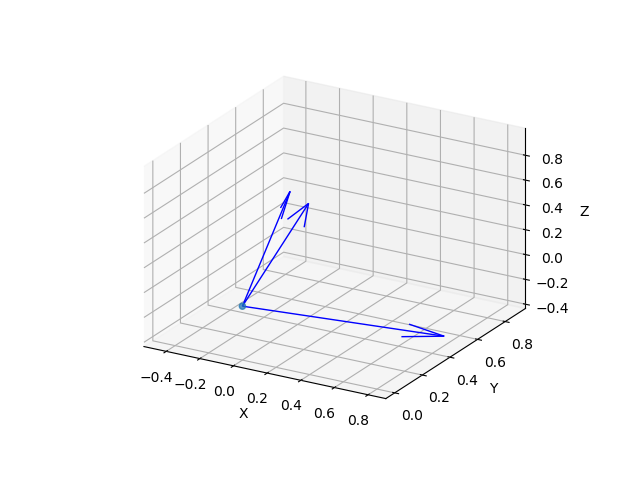

In [8]:
plt.figure() # create a new figure
trplot(R)
plt.show()

and we can convert any rotation matrix back to its 3-angle representation

In [9]:
tr2rpy(R, unit='deg')

[10. 20. 30.]

In robotics we also need to describe the position of objects and we can do this with a _homogeneous transformation_ matrix – a 4x4 matrix – which belong to the group SE(3).

We can create such a matrix, for a translation of 1 in the x-direction, 2 in the y-direction and 3 in the z-direction by

In [10]:
T = transl(1, 2, 3)
T

[[1. 0. 0. 1.]
 [0. 1. 0. 2.]
 [0. 0. 1. 3.]
 [0. 0. 0. 1.]]

which is an identity matrix with the translation values in the right-most column.

We could also create by passing the values in as a 3-element list or numpy array

In [11]:
T = transl([1,2,3])
T

[[1. 0. 0. 1.]
 [0. 1. 0. 2.]
 [0. 0. 1. 3.]
 [0. 0. 0. 1.]]

We can visualize this as well

<IPython.core.display.Javascript object>


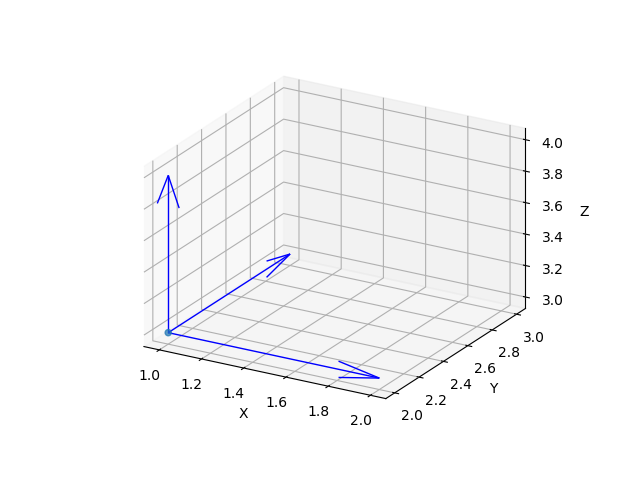

In [12]:
plt.figure() # create a new figure
trplot(T)

Clearly representing an orientation with 9 numbers is inefficient, and representing 3 translation values with a total of 16 numbers is even more wasteful.  But there's some serious magic possible

In [13]:
T = transl(1, 2, 3) @ trotx(30, 'deg')
T

[[ 1.         0.         0.         1.       ]
 [ 0.         0.8660254 -0.5        2.       ]
 [ 0.         0.5        0.8660254  3.       ]
 [ 0.         0.         0.         1.       ]]

Is a composition of two motions: a translation and _then_ a rotation.  We can see the rotation matrix, computed above, in the top-left corner and the translation components in the right-most column.  In the earlier example Out[20] was simply a null-rotation which is represented by the identity matrix.

The frame now looks like this

<IPython.core.display.Javascript object>


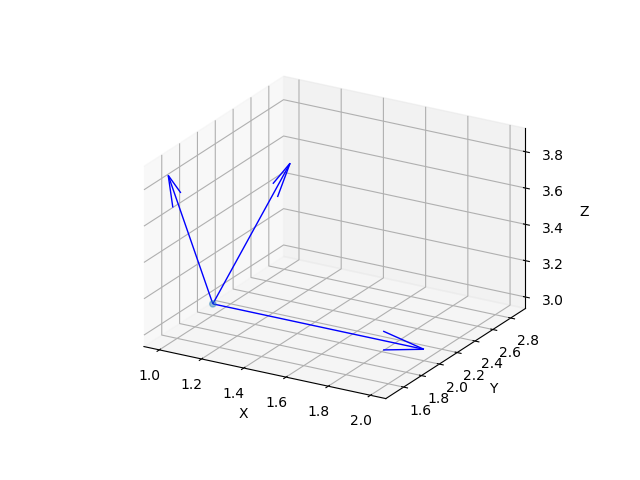

In [14]:
plt.figure() # create a new figure
trplot(T)

### A couple of important points:

You might have noticed that the we used `trotx` rather than `rotx` in this example.  We need to _promote_ the rotation which belongs to the group SO(3) to a general 3D motion in the group SE(3).  We do this by 

Look at the structure of these two matrices

In [15]:
rotx(45, 'deg')

[[ 1.          0.          0.        ]
 [ 0.          0.70710678 -0.70710678]
 [ 0.          0.70710678  0.70710678]]

In [16]:
trotx(45, 'deg')

[[ 1.          0.          0.          0.        ]
 [ 0.          0.70710678 -0.70710678  0.        ]
 [ 0.          0.70710678  0.70710678  0.        ]
 [ 0.          0.          0.          1.        ]]

The **order is important**, compare

In [17]:
T1 = transl(1, 2, 3) @ trotx(30, 'deg')

with

In [18]:
T2 = trotx(30, 'deg') @ transl(1, 2, 3)

which we show in a single plot

<IPython.core.display.Javascript object>


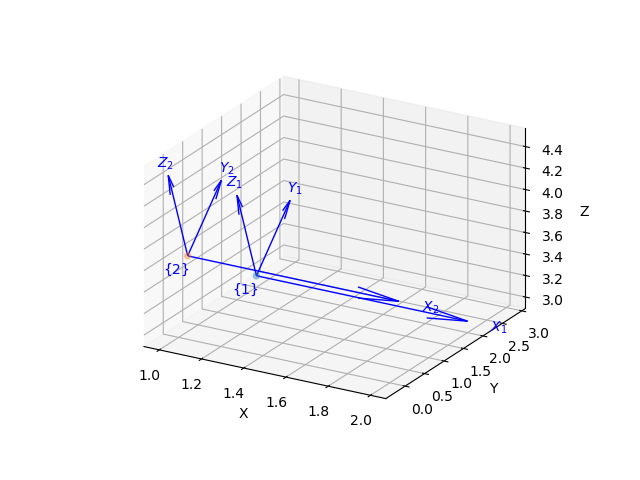

In [19]:
plt.figure()
trplot(T1, frame='1')
trplot(T2, frame='2')

In words we explain the difference as:

    1. Move then rotate
    2. Rotate, then move with respect to the rotated coordinate system

## Working in 2D

Things are actually much simpler in 2D.  There's only one possible rotation which is around an axis perpendicular to the plane (where the z-axis would have been if it were in 3D).

Rotations in 2D can be represented by rotation matrices – 2x2 orthonormal matrices – which belong to the group SO(2). Just as for the 3D case these matrices have special properties, each column (and row) is a unit vector, and they are all orthogonal, the inverse of this matrix is equal to its transpose, and its determinant is +1.

We can create such a matrix, a rotation of $\pi/4$ radians by

In [20]:
R = rot2(math.pi/4)
R

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

or in degrees

In [21]:
rot2(45, 'deg')

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

and we can plot this on the 2D plane

<IPython.core.display.Javascript object>


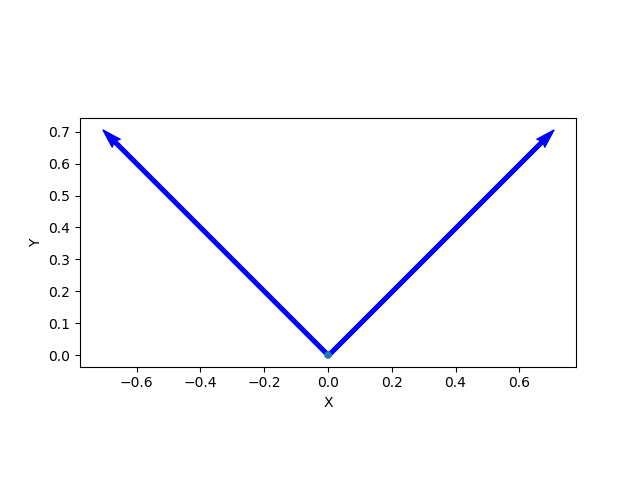

In [22]:
plt.figure() # create a new figure
trplot2(R)

Once again, it's useful to describe the position of things and we do this this with a homogeneous transformation matrix – a 3x3 matrix – which belong to the group SE(2).

In [23]:
T = transl2(1, 2)
T

[[1. 0. 1.]
 [0. 1. 2.]
 [0. 0. 1.]]

which has a similar structure to the 3D case.  The rotation matrix is in the top-left corner and the translation components are in the right-most column.

We can also call the function with the element in a list

In [24]:
T = transl2([1, 2])

<IPython.core.display.Javascript object>


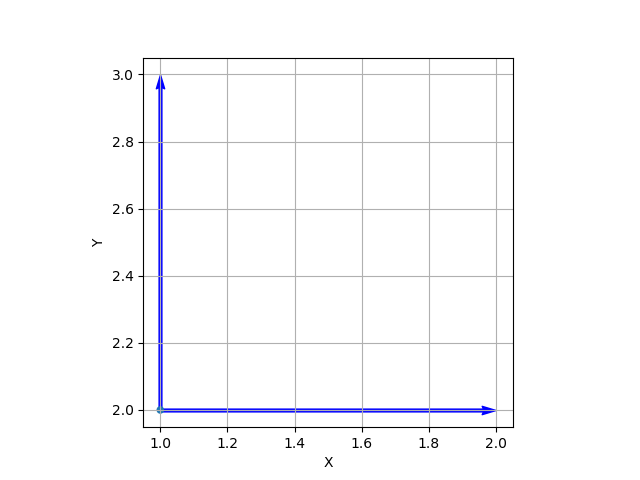

In [25]:
plt.figure() # create a new figure
trplot2(T)
plt.grid(True)

In [26]:
T = transl2(1, 2) @ trot2(45, 'deg')
T

[[ 0.70710678 -0.70710678  1.        ]
 [ 0.70710678  0.70710678  2.        ]
 [ 0.          0.          1.        ]]

<IPython.core.display.Javascript object>


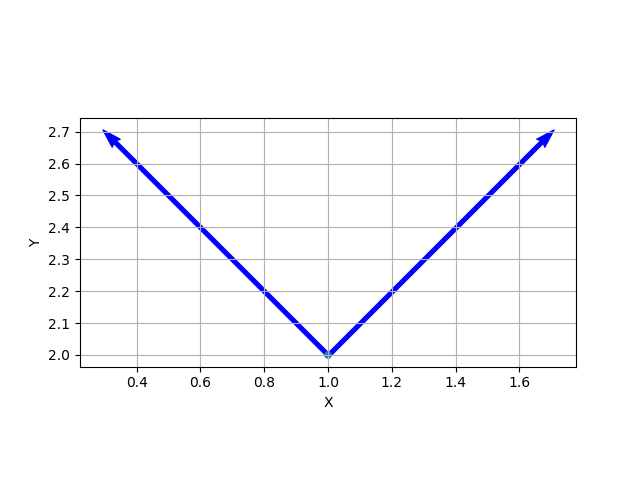

In [27]:
plt.figure() # create a new figure
trplot2(T)
plt.grid(True)